In [49]:
#from jdaviz import Imviz,Cubeviz,Specviz
from astropy.io import fits
from glob import glob
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from astropy import wcs

In [2]:
PATH = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/'
PATH2 = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/'

In [38]:
sk = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1441/mastDownload/JWST/jw01441-a3001_t004_nircam_f335m-maskbar-sub320alwb_psfstack.fits'

In [ ]:
from __future__ import division, print_function

import numpy
from astropy import wcs
from astropy.io import fits
import sys

def load_wcs_from_file(filename):
    # Load the FITS hdulist using astropy.io.fits
    hdulist = fits.open(filename)

    # Parse the WCS keywords in the primary HDU
    w = wcs.WCS(hdulist[0].header)

    # Print out the "name" of the WCS, as defined in the FITS header
    print(w.wcs.name)

    # Print out all of the settings that were parsed from the header
    w.wcs.print_contents()

    # Some pixel coordinates of interest.
    pixcrd = numpy.array([[0, 0], [24, 38], [45, 98]], numpy.float_)

    # Convert pixel coordinates to world coordinates
    # The second argument is "origin" -- in this case we're declaring we
    # have 1-based (Fortran-like) coordinates.
    world = w.wcs_pix2world(pixcrd, 1)
    print(world)

    # Convert the same coordinates back to pixel coordinates.
    pixcrd2 = w.wcs_world2pix(world, 1)
    print(pixcrd2)

    # These should be the same as the original pixel coordinates, modulo
    # some floating-point error.
    assert numpy.max(numpy.abs(pixcrd - pixcrd2)) < 1e-6

In [50]:
hdulist = fits.open(sk)

In [51]:
w = wcs.WCS(hdulist[0].header)

In [57]:
sci = hdulist[1].data

In [59]:
pixcrd = sci[0]

In [60]:
world = w.wcs_pix2world(pixcrd,1)

ValueError: When providing two arguments, the array must be of shape (N, 2)

In [ ]:
pixcrd = 

In [41]:
sci_psf = psf[1].data 

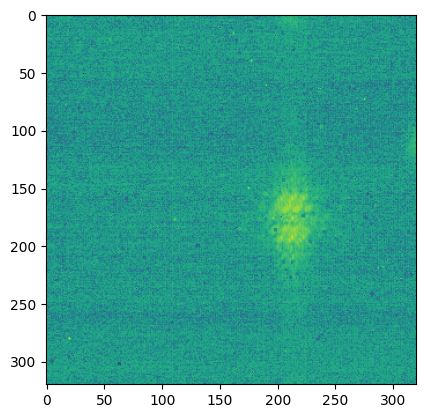

In [42]:
plt.imshow(np.arcsinh(sci_psf[4,:,:]))

In [25]:
cry = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1441/mastDownload/JWST/jw01441001001_03106_00001_nrcalong_a3001_crfints.fits'

In [26]:
crfints = fits.open(cry)

In [27]:
crfints.info()
sci_crfints = crfints[1].data

Filename: /home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1441/mastDownload/JWST/jw01441001001_03106_00001_nrcalong_a3001_crfints.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     352   ()      
  1  SCI           1 ImageHDU        97   (320, 320, 63)   float32   
  2  ERR           1 ImageHDU        11   (320, 320, 63)   float32   
  3  DQ            1 ImageHDU        12   (320, 320, 63)   int32 (rescales to uint32)   
  4  AREA          1 ImageHDU         9   (320, 320)   float32   
  5  INT_TIMES     1 BinTableHDU     24   63R x 7C   [J, D, D, D, D, D, D]   
  6  VAR_POISSON    1 ImageHDU        10   (320, 320, 63)   float32   
  7  VAR_RNOISE    1 ImageHDU        10   (320, 320, 63)   float32   
  8  VAR_FLAT      1 ImageHDU        10   (320, 320, 63)   float32   
  9  ASDF          1 BinTableHDU     11   1R x 1C   [26030B]   


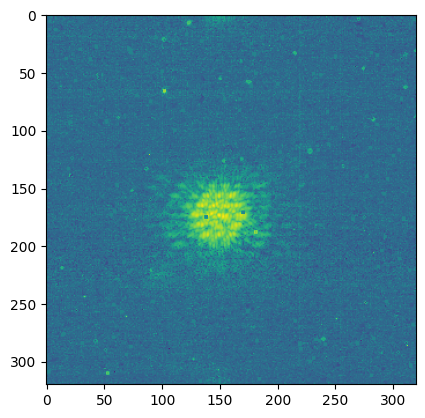

In [28]:
plt.imshow(np.arcsinh(sci_crfints[62,:,:]))

In [30]:
med = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1441/mastDownload/JWST/jw01441001001_03106_00001_nrcalong_median.fits'

In [31]:
median = fits.open(med)
sci_med = median[1].data
median.info()

Filename: /home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1441/mastDownload/JWST/jw01441001001_03106_00001_nrcalong_median.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     351   ()      
  1  SCI           1 ImageHDU        96   (320, 320)   float32   
  2  ERR           1 ImageHDU         7   ()      
  3  ASDF          1 BinTableHDU     11   1R x 1C   [24463B]   


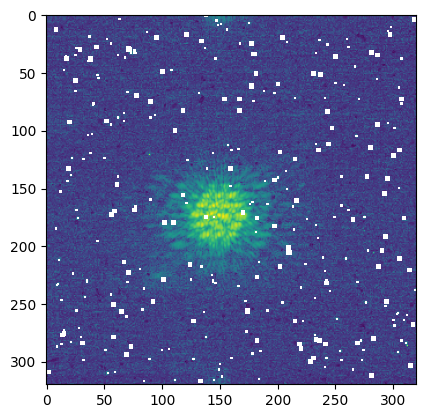

In [32]:
plt.imshow(np.arcsinh(sci_med))

In [33]:
calints_files = glob(os.path.join(PATH,'jw01441003001*/*rateints.fits'))
calints_files2 = glob(os.path.join(PATH2,'*calints.fits'))

In [34]:
calints_files

['/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01441003001_03106_00005_nrcalong/jw01441003001_03106_00005_nrcalong_rateints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01441003001_03106_00004_nrcalong/jw01441003001_03106_00004_nrcalong_rateints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01441003001_03106_00008_nrcalong/jw01441003001_03106_00008_nrcalong_rateints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01441003001_03104_00001_nrcalong/jw01441003001_03104_00001_nrcalong_rateints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01441003001_03106_00003_nrcalong/jw01441003001_03106_00003_nrcalong_rateints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01441003001_03106_00006_nrcalong/jw01441003001_03106_00006_nrcalong_ra

In [35]:
calints_long = fits.open(calints_files[0])

In [36]:
hd = calints_long[0]
hd.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2022-10-02T22:44:35.059' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw01441003001_03106_00005_nrcalong_rateints.fits' / Name of the file 
SDP_VER = '2022_3a '           / Data processing software version number        
PRD_VER = 'PRDOPSSOC-058'      / S&OC PRD version number used in data processing
OSS_VER = '008.004.011.000'    / Observatory Scheduling Software (OSS) version n
CAL_VER = '1.7.2   '        

In [4]:
calints_files

['/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01075001001_03105_00001_nrca1/jw01075001001_03105_00001_nrca1_calints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01075001001_03105_00001_nrca2/jw01075001001_03105_00001_nrca2_calints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01075001001_03105_00002_nrca1/jw01075001001_03105_00002_nrca1_calints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01075001001_03105_00001_nrca4/jw01075001001_03105_00001_nrca4_calints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01075001001_03105_00001_nrca3/jw01075001001_03105_00001_nrca3_calints.fits']

In [54]:
calint1 = fits.open(calints_files[2])

In [55]:
type(calint1)

astropy.io.fits.hdu.hdulist.HDUList

In [56]:
calint1.info()

Filename: /home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01075001001_03105_00002_nrca1/jw01075001001_03105_00002_nrca1_calints.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     356   ()      
  1  SCI           1 ImageHDU       113   (2048, 2048, 1)   float32   
  2  ERR           1 ImageHDU        11   (2048, 2048, 1)   float32   
  3  DQ            1 ImageHDU        12   (2048, 2048, 1)   int32 (rescales to uint32)   
  4  AREA          1 ImageHDU         9   (2048, 2048)   float32   
  5  INT_TIMES     1 BinTableHDU     24   1R x 7C   [J, D, D, D, D, D, D]   
  6  VAR_POISSON    1 ImageHDU        10   (2048, 2048, 1)   float32   
  7  VAR_RNOISE    1 ImageHDU        10   (2048, 2048, 1)   float32   
  8  VAR_FLAT      1 ImageHDU        10   (2048, 2048, 1)   float32   
  9  ASDF          1 BinTableHDU     11   1R x 1C   [25559B]   


In [27]:
for i in range(len(calints_files)):
    
    calint1 = fits.open(calints_files[i])
    
    hdu = calint1[0]
    try:
        print(hdu.header['IS_PSF'])
    except:
        print(hdu.header['EXP_TYPE'])

True
True
True
NRC_TACONFIRM
True
True
True
True
NRC_TACONFIRM
NRC_TACQ
True
True


In [24]:
hdu = calint1[0]
sci = calint1[1]
err = calint1[2]
dq = calint1[3]
area = calint1[4]
int_times = calint1[5]
var_poisson = calint1[6]
var_flat = calint1[7]
var_flat = calint1[8]

IndexError: list index out of range